In [1]:
import vital_sqi
from vital_sqi.data.signal_io import ECG_reader,PPG_reader
import os
file_name = "example.edf"
ecg_data = ECG_reader(os.path.join("../tests/test_data",file_name),'edf')
file_name = "ppg_smartcare.csv"
ppg_data = PPG_reader(os.path.join("../tests/test_data",file_name),
                      signal_idx=['PLETH'],
                      timestamp_idx= ['TIMESTAMP_MS'],
                      info_idx=['SPO2_PCT','PULSE_BPM','PERFUSION_INDEX'])

In [2]:
all_channels = ecg_data.signals
channel_1 = all_channels[:,0]

### Example of splitting the whole data into subsegment using time domain for ECG.

In [3]:
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(len(channel_1))

265536


**The whole channel length will be splitted into each 30-second segment**

In [5]:
from vital_sqi.data import split_to_subsegments

In [6]:
save_file_name = file_name.split(".")[-1]
save_file_folder = "subsegments_time"
split_to_subsegments(channel_1,filename=None,
                     sampling_rate=256,
                     segment_length_second=10.0,
                     wave_type=ecg_data.wave_type,
                     split_type="time",
                     save_file_folder=save_file_folder)

100%|██████████| 103/103 [00:00<00:00, 282.01it/s]


**The function requires the sampling rate and the defined length (in seconds) of the split segment to calculate the cutting points. User also defined a location to save the output of cut files**

**The split_to_subsegments output the saved segment at the defined save folder. Save files takes the format of "[file_name]-[segment_number].csv"**

In [7]:
print(os.listdir("subsegments_time/ecg/"))

['segment-076.csv', 'segment-068.csv', 'segment-024.csv', 'segment-018.csv', 'segment-010.csv', 'segment-002.csv', 'segment-102.csv', 'segment-088.csv', 'segment-027.csv', 'segment-103.csv', 'segment-043.csv', 'segment-086.csv', 'segment-003.csv', 'segment-058.csv', 'segment-030.csv', 'segment-025.csv', 'segment-042.csv', 'segment-093.csv', 'segment-026.csv', 'segment-045.csv', 'segment-094.csv', 'segment-063.csv', 'segment-005.csv', 'segment-089.csv', 'segment-066.csv', 'segment-021.csv', 'segment-008.csv', 'segment-064.csv', 'segment-083.csv', 'segment-028.csv', 'segment-050.csv', 'segment-035.csv', 'segment-039.csv', 'segment-007.csv', 'segment-080.csv', 'segment-015.csv', 'segment-079.csv', 'segment-001.csv', 'segment-034.csv', 'segment-033.csv', 'segment-059.csv', 'segment-051.csv', 'segment-017.csv', 'segment-081.csv', 'segment-065.csv', 'segment-087.csv', 'segment-072.csv', 'segment-031.csv', 'segment-091.csv', 'segment-047.csv', 'segment-101.csv', 'segment-044.csv', 'segment-06

In [7]:
segment_51 = np.loadtxt("subsegments_time/ecg/segment-051.csv")
segment_52 = np.loadtxt("subsegments_time/ecg/segment-052.csv")

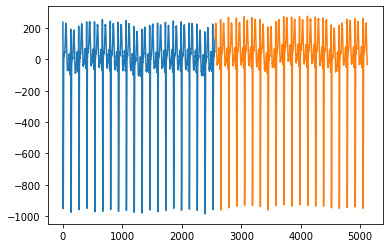

In [8]:
#Uncomment the plotly code to use interactive plot

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(segment_51)),
#                          y= segment_51,
#                          name='segment 51'))
# fig.add_trace(go.Scatter(x=np.arange(len(segment_51),
#                                      len(segment_51)+len(segment_52)),
#                          y= segment_52,
#                          name='segment 52'))
# fig.show()


fig = plt.Figure()
plt.plot(np.arange(len(segment_51)),
         segment_51)
plt.plot(np.arange(len(segment_51),len(segment_51)+len(segment_52)),
         segment_52)
plt.show()

### Example of splitting the whole data into subsegment using time domain for PPG.

In [9]:
save_file_name = file_name.split(".")[-1]
save_file_folder = "subsegments_time"
split_to_subsegments(ppg_data.signals,filename=None,
                     sampling_rate=256,
                     segment_length_second=10.0,
                     wave_type=ppg_data.wave_type,
                     split_type="time",
                     save_file_folder=save_file_folder)

100%|██████████| 9/9 [00:00<00:00, 296.97it/s]


In [10]:
print(os.listdir("subsegments_time/ppg/"))

['segment-7.csv', 'segment-5.csv', 'segment-1.csv', 'segment-9.csv', 'segment-8.csv', 'segment-6.csv', 'segment-3.csv', 'segment-4.csv', 'segment-2.csv']


In [11]:
segment_1 = np.loadtxt("subsegments_time/ppg/segment-1.csv")
segment_2 = np.loadtxt("subsegments_time/ppg/segment-2.csv")

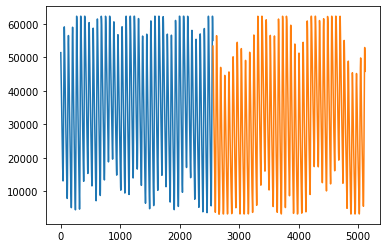

In [12]:
# Uncomment the plotly code to use interactive plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(segment_1)),
#                          y= segment_1,
#                          name='segment 1'))
# fig.add_trace(go.Scatter(x=np.arange(len(segment_1),
#                                      len(segment_1)+len(segment_2)),
#                          y= segment_2,
#                          name='segment 2'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(segment_1)),
         segment_1)
plt.plot(np.arange(len(segment_1),len(segment_1)+len(segment_2)),
         segment_2)
plt.show()

### Example of splitting the whole data into subsegment using frequency domian for ECG.

### Notes on the difference of splitting point as comparing with time domain splitting. Uncomment the plotly code - interactive plot - for better observation

In [13]:
save_file_name = file_name.split(".")[-1]
save_file_folder = "subsegments_frequency"
split_to_subsegments(channel_1,filename=None,
                     sampling_rate=256,
                     segment_length_second=10.0,
                     split_type="peak_interval",
                     save_file_folder=save_file_folder)

/home/khoa/Workspace/Github/vital_sqi/vital_sqi/data/segment_split.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  save_each_segment(filename, np.array(segments),save_file_folder,
100%|██████████| 104/104 [00:00<00:00, 291.28it/s]


In [14]:
segment_51 = np.loadtxt("subsegments_frequency/ecg/segment-051.csv")
segment_52 = np.loadtxt("subsegments_frequency/ecg/segment-052.csv")

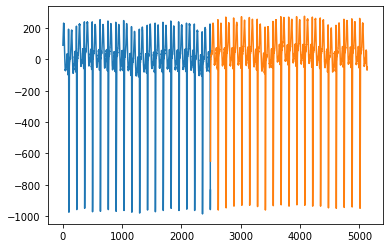

In [15]:
# Uncomment the plotly code to use interactive plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(segment_51)),
#                          y= segment_51,
#                          name='segment 51'))
# fig.add_trace(go.Scatter(x=np.arange(len(segment_51),
#                                      len(segment_51)+len(segment_52)),
#                          y= segment_52,
#                          name='segment 52'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(segment_51)),
         segment_51)
plt.plot(np.arange(len(segment_51),len(segment_51)+len(segment_52)),
         segment_52)
plt.show()

### Example of splitting the whole data into subsegment using frequency domian for PPG.

In [16]:
save_file_name = file_name.split(".")[-1]
save_file_folder = "subsegments_frequency"
split_to_subsegments(ppg_data.signals,filename=None,
                     sampling_rate=256,
                     segment_length_second=10.0,
                     wave_type=ppg_data.wave_type,
                     split_type="peak_interval",
                     save_file_folder=save_file_folder)

/home/khoa/Workspace/Github/vital_sqi/vital_sqi/data/segment_split.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  save_each_segment(filename, np.array(segments),save_file_folder,
100%|██████████| 10/10 [00:00<00:00, 344.14it/s]


In [17]:
segment_1 = np.loadtxt("subsegments_frequency/ppg/segment-01.csv")
segment_2 = np.loadtxt("subsegments_frequency/ppg/segment-02.csv")

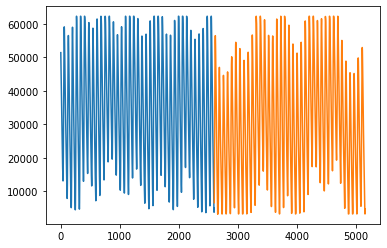

In [18]:
# Uncomment to use interactive plot
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(segment_1)),
#                          y= segment_1,
#                          name='segment 1'))
# fig.add_trace(go.Scatter(x=np.arange(len(segment_1),
#                                      len(segment_1)+len(segment_2)),
#                          y= segment_2,
#                          name='segment 2'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(segment_1)),
         segment_1)
plt.plot(np.arange(len(segment_1),len(segment_1)+len(segment_2)),
         segment_2)
plt.show()

### Example of trimming the first and the last n-minute data.

In [19]:
from vital_sqi.data import trim_data

In [20]:
trimmed_data = trim_data(channel_1,minute_remove=10)

In [21]:
trimmed_data

array([ 64.75938048,  75.78225376,  84.04940871, ..., 213.56816968,
       205.30101472, 202.54529641])

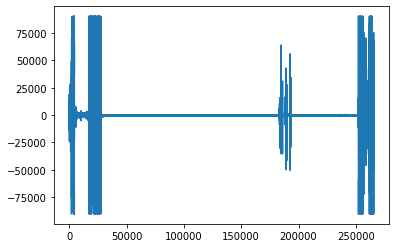

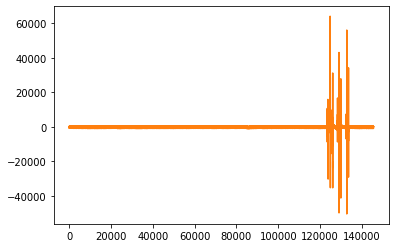

In [22]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(channel_1)),
#                          y= channel_1,
#                          name='full data'))
# fig.show()

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(trimmed_data)),
#                          y= trimmed_data,
#                          name='trimmed data'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(channel_1)),
         channel_1)
plt.show()
plt.plot(np.arange(len(trimmed_data)),
         trimmed_data,color=u'#ff7f0e')
plt.show()

**The before and after trimming 5 minutes segment**

In [23]:
trimmed_data_ppg = trim_data(ppg_data.signals,minute_remove=1)

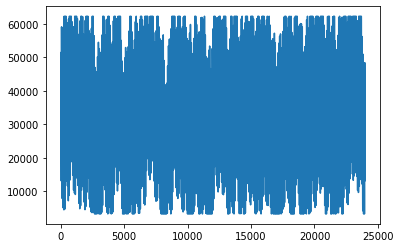

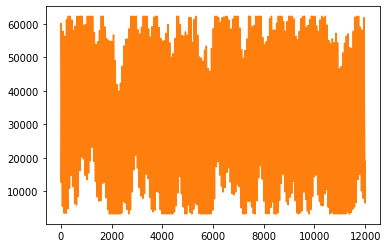

In [24]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(ppg_data.signals)),
#                          y= ppg_data.signals,
#                          name='full data'))
# fig.show()

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(trimmed_data_ppg)),
#                          y= trimmed_data_ppg,
#                          name='trimmed data'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(ppg_data.signals)),
         ppg_data.signals)
plt.show()
plt.plot(np.arange(len(trimmed_data_ppg)),
         trimmed_data_ppg,
         color=u'#ff7f0e')
plt.show()

### Example of before and after removing the unchanged value of the n-continuous second.

In [25]:
from vital_sqi.data.removal_utilities import remove_unchanged_squences

In [26]:
# create a series of unchanged value in the trimmed_data list
idx = np.random.randint(int(len(trimmed_data)/2))
sampling_rate = 256
unchanged_data = trimmed_data.copy()
unchanged_data[idx:idx+sampling_rate*20] = max(trimmed_data)

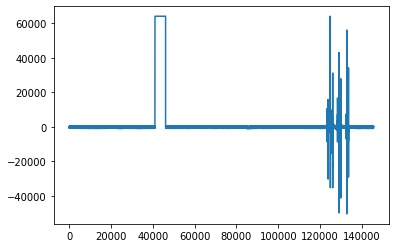

In [27]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=np.arange(len(unchanged_data)),
#                          y= unchanged_data,
#                          name='trimmed data'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(unchanged_data)),
         unchanged_data)
plt.show()

In [28]:
start_list, end_list = \
    remove_unchanged_squences(unchanged_data, 
                              unchanged_seconds= 10,
                              sampling_rate=256, 
                              as_dataframe=False)

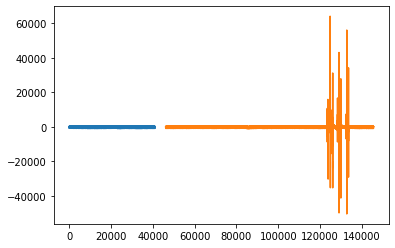

In [29]:
# fig = go.Figure()
# for start,end in zip(start_list,end_list):
#     fig.add_trace(go.Scatter(x=np.arange(start,end),
#                              y= unchanged_data[start:end],
#                              name='trimmed data'))
# fig.show()

fig = plt.Figure()
for start,end in zip(start_list,end_list):
    plt.plot(np.arange(start,end),
         unchanged_data[start:end])
plt.show()

### Example of removing invalid signal data (signal = 0 and other vital signs exceed the normal range)

In [30]:
from vital_sqi.data import remove_invalid

In [31]:
trimmed_data = trim_data(channel_1,minute_remove=10)
error_data = trimmed_data.copy()

In [32]:
# create a series of unchanged value in the trimmed_data list
idx = np.random.randint(int(len(error_data)/2))
sampling_rate = 256
error_data[idx:idx+sampling_rate*20] = 0

In [33]:
start_list, end_list = remove_invalid(error_data,as_dataframe=False)

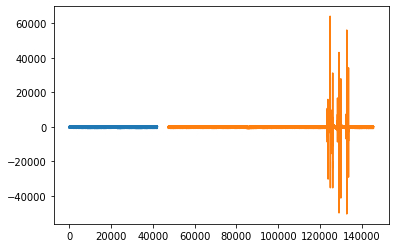

In [34]:
# fig = go.Figure()
# for start,end in zip(start_list,end_list):
#     fig.add_trace(go.Scatter(x= np.arange(start,end),
#                              y= trimmed_data[start:end],
#                              name='trimmed data'))
# fig.show()
fig = plt.Figure()
for start,end in zip(start_list,end_list):
    plt.plot(np.arange(start,end),
         trimmed_data[start:end])
plt.show()

### One example of removing invalid signal data using the frequency domain

In [35]:
from vital_sqi.data import cut_by_frequency_partition

In [36]:
start_list, end_list = \
    cut_by_frequency_partition(trimmed_data,
                              window_size=30000,
                              peak_threshold_ratio=4,
                              lower_bound_threshold=2)

**Welch method is applied for the whole data to obtain the common frequency component.**

**After that, a scanning window with the size of 3000 samples is computed for each subsegment to analyse its frequency component.**

**Any windows having its component exceeds the peak_threshold_ratio (the ratio between the number of subsegment's components and the number of whole data components) will be removed.**

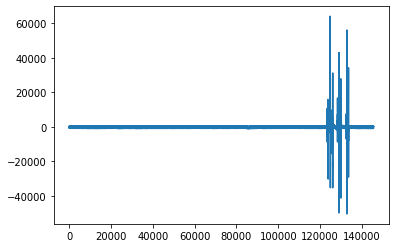

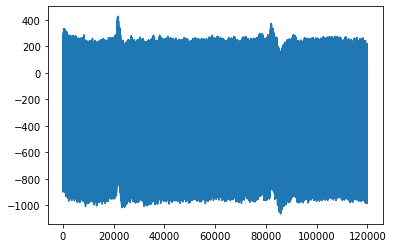

In [37]:
# fig = go.Figure()
# for start,end in zip(start_list,end_list):
#     fig.add_trace(go.Scatter(x= np.arange(start,end),
#                              y= trimmed_data[start:end],
#                              name='trimmed data'))
# fig.show()

fig = plt.Figure()
plt.plot(np.arange(len(trimmed_data)),
         trimmed_data)
plt.show()


fig = plt.Figure()
for start,end in zip(start_list,end_list):
    plt.plot(np.arange(start,end),
         trimmed_data[start:end])
plt.show()

In [38]:
out = PPG_reader(os.path.join(os.getcwd(),'..', 'tests/test_data/ppg_smartcare.csv'), 
                 timestamp_idx = ['TIMESTAMP_MS'], signal_idx = ['PLETH'], 
                 info_idx = ['PULSE_BPM','SPO2_PCT','PERFUSION_INDEX'])

In [39]:
start_list, end_list = \
    cut_by_frequency_partition(ppg_data.signals,
                              window_size=30000,
                              peak_threshold_ratio=2,
                              lower_bound_threshold=2)

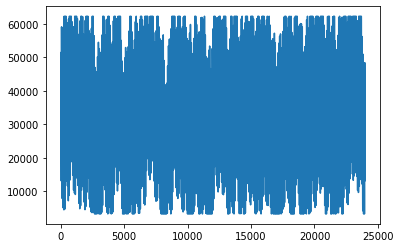

In [41]:
# fig = go.Figure()
# for start,end in zip(start_list,end_list):
#     fig.add_trace(go.Scatter(x= np.arange(start,end),
#                              y= ppg_data.signals[start:end],
#                              name='trimmed data'))
# fig.show()
fig = plt.Figure()
plt.plot(np.arange(len(ppg_data.signals)),
         ppg_data.signals)
plt.show()


fig = plt.Figure()
for start,end in zip(start_list,end_list):
    plt.plot(np.arange(start,end),
         ppg_data.signals[start:end])
plt.show()